# Visualisations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import folium
from folium.plugins import HeatMap
import matplotlib.colors as mcolors

: 

In [2]:
# Importing dataset
filepath = r"C:/Users/clara/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DTU/Human Centeret Artificial Intelligence/2. semester/02806_Social_Data_Analysis_and_Visualization/MTA_Subway_Hourly_Ridership__2020-2024_20250408.csv"
df = pd.read_csv(filepath)

# Display the first few rows of the dataset
print(df.head())

KeyboardInterrupt: 

In [3]:
# Importing dataset in chunks to handle memory issues
filepath = r"C:/Users/clara/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DTU/Human Centeret Artificial Intelligence/2. semester/02806_Social_Data_Analysis_and_Visualization/MTA_Subway_Hourly_Ridership__2020-2024_20250408.csv"

# Load the first chunk to inspect the data
chunk_size = 100000  # Adjust the chunk size as needed
chunk_iter = pd.read_csv(filepath, chunksize=chunk_size)

# Combine the first few chunks to inspect the data
df = pd.concat([chunk for _, chunk in zip(range(5), chunk_iter)], ignore_index=True)

# Display the first few rows of the combined dataset
print(df.head())

        transit_timestamp transit_mode station_complex_id  \
0  05/31/2021 05:00:00 PM       subway                250   
1  05/31/2021 09:00:00 AM       subway                318   
2  05/31/2021 09:00:00 AM       subway                385   
3  05/31/2021 08:00:00 PM       subway                198   
4  05/31/2021 09:00:00 PM       subway                  2   

                station_complex    borough payment_method  \
0                 Kings Hwy (F)   Brooklyn      metrocard   
1    34 St-Penn Station (1,2,3)  Manhattan      metrocard   
2                    176 St (4)      Bronx      metrocard   
3  Howard Beach-JFK Airport (A)     Queens      metrocard   
4            Astoria Blvd (N,W)     Queens      metrocard   

            fare_class_category  ridership  transfers   latitude  longitude  \
0          Metrocard - Students          3          0  40.603218  -73.97236   
1  Metrocard - Unlimited 30-Day         43          0  40.750374  -73.99106   
2         Metrocard - Fair Fa

### Polar chart

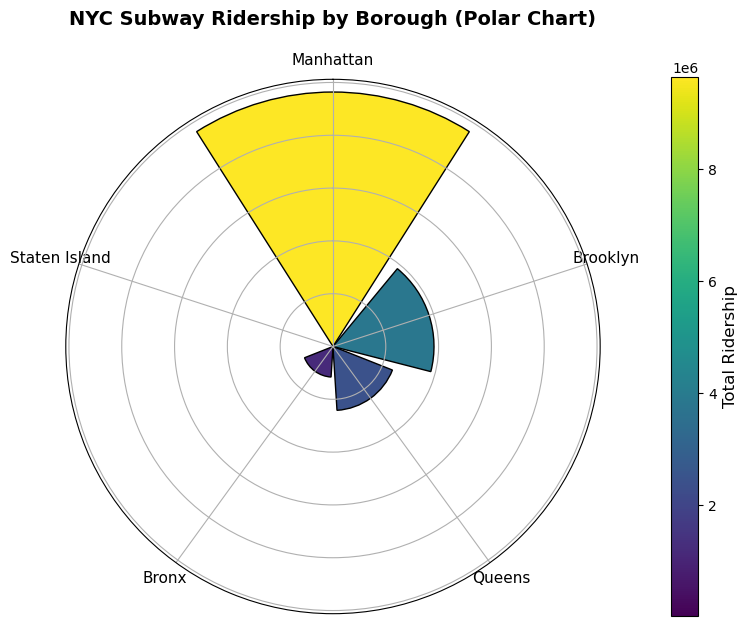

In [4]:
# Clean
df = df.dropna(subset=['borough', 'ridership'])
df = df[df['ridership'] > 0]

# Aggregate borough ridership
borough_usage = df.groupby('borough')['ridership'].sum().reset_index()
borough_usage = borough_usage.sort_values(by='ridership', ascending=False)

# Extract values
labels = borough_usage['borough'].tolist()
values = borough_usage['ridership'].values
normed_values = values / values.max()  # for colormap

# Define angles
angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
width = 2 * np.pi / len(values)

# Color mapping
colors = plt.cm.viridis(normed_values)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, values, width=width * 0.9, color=colors, edgecolor='black')

# Clock-style layout
ax.set_theta_offset(np.pi / 2)       # Start at top
ax.set_theta_direction(-1)           # Go clockwise
ax.set_yticklabels([])               # Hide radial labels
ax.set_xticks(angles)                # Set ticks
ax.set_xticklabels(labels, fontsize=11)

# Add color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=mcolors.Normalize(vmin=values.min(), vmax=values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Total Ridership', fontsize=12)

# Add title
ax.set_title('NYC Subway Ridership by Borough (Polar Chart)', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Jitterplot

C:\Users\clara\AppData\Local\Temp\ipykernel_6076\3454551153.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
C:\Users\clara\AppData\Local\Temp\ipykernel_6076\3454551153.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='borough', y='ridership',


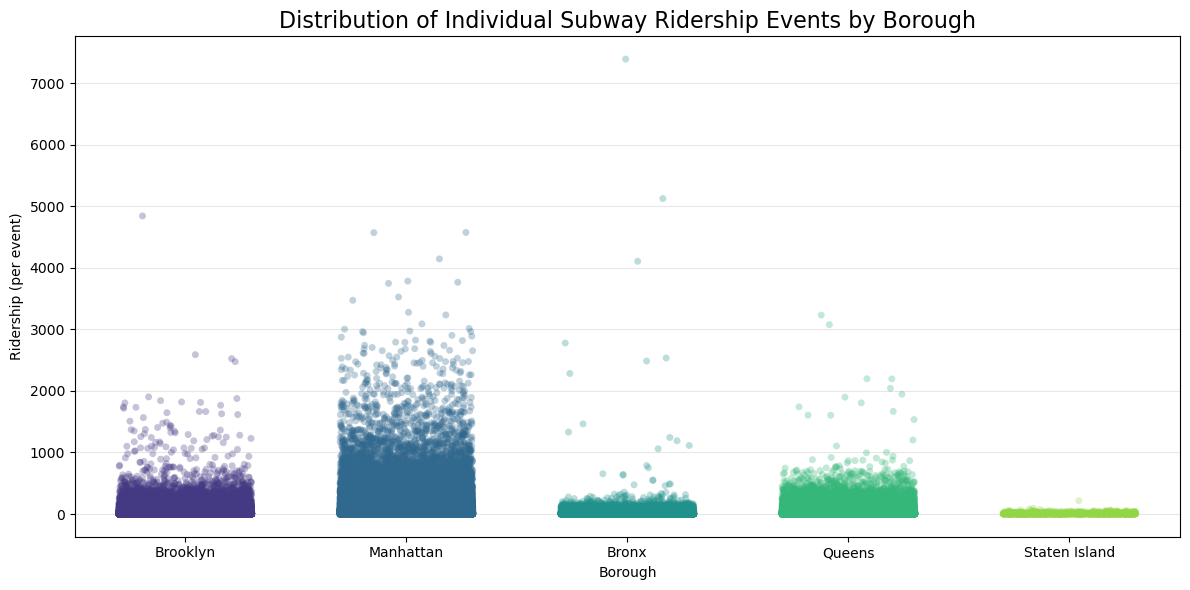

In [5]:
# Clean: drop missing and zero values
df = df.dropna(subset=['borough', 'ridership'])
df = df[df['ridership'] > 0]

# Optional: limit ridership to a reasonable max for visibility
df = df[df['ridership'] < 10000]  # adjust as needed

# Optional: create a weekend flag
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
df['day_of_week'] = df['transit_timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6])

# Plot: Basic jitter plot
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='borough', y='ridership', 
              jitter=0.3, alpha=0.3, palette='viridis')

# Customize
plt.title("Distribution of Individual Subway Ridership Events by Borough", fontsize=16)
plt.ylabel("Ridership (per event)")
plt.xlabel("Borough")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Size of the data

In [6]:
# Output basic size info
print("Shape:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nColumns:\n", df.columns.tolist())

# Estimate memory usage
print("\nMemory usage (MB):")
print(df.memory_usage(deep=True).sum() / (1024**2))


Shape: (500000, 14)
Number of rows: 500000
Number of columns: 14

Columns:
 ['transit_timestamp', 'transit_mode', 'station_complex_id', 'station_complex', 'borough', 'payment_method', 'fare_class_category', 'ridership', 'transfers', 'latitude', 'longitude', 'Georeference', 'day_of_week', 'is_weekend']

Memory usage (MB):
228.74406051635742
